# PREDICTION

## AIRBNB Price Prediction in USA

In this project we take data of Airbnb listings in the USA and try to predict the price of stay in that listing.

The data includes 43167 listings and 29 columns - including log_price, what we are trying to predict.

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [221]:
data = pd.read_csv('Airbnb_Dataset1.csv')

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43167 entries, 0 to 43166
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      43167 non-null  int64  
 1   log_price               43167 non-null  float64
 2   property_type           43167 non-null  object 
 3   room_type               43167 non-null  object 
 4   amenities               43167 non-null  object 
 5   accommodates            43167 non-null  int64  
 6   bathrooms               43059 non-null  float64
 7   bed_type                43167 non-null  object 
 8   cancellation_policy     43167 non-null  object 
 9   cleaning_fee            43167 non-null  bool   
 10  city                    43167 non-null  object 
 11  description             43167 non-null  object 
 12  first_review            34358 non-null  object 
 13  host_has_profile_pic    43054 non-null  object 
 14  host_identity_verified  43054 non-null

In [223]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [224]:
data.shape

(43167, 29)

## Data Visualization

### Heatmap

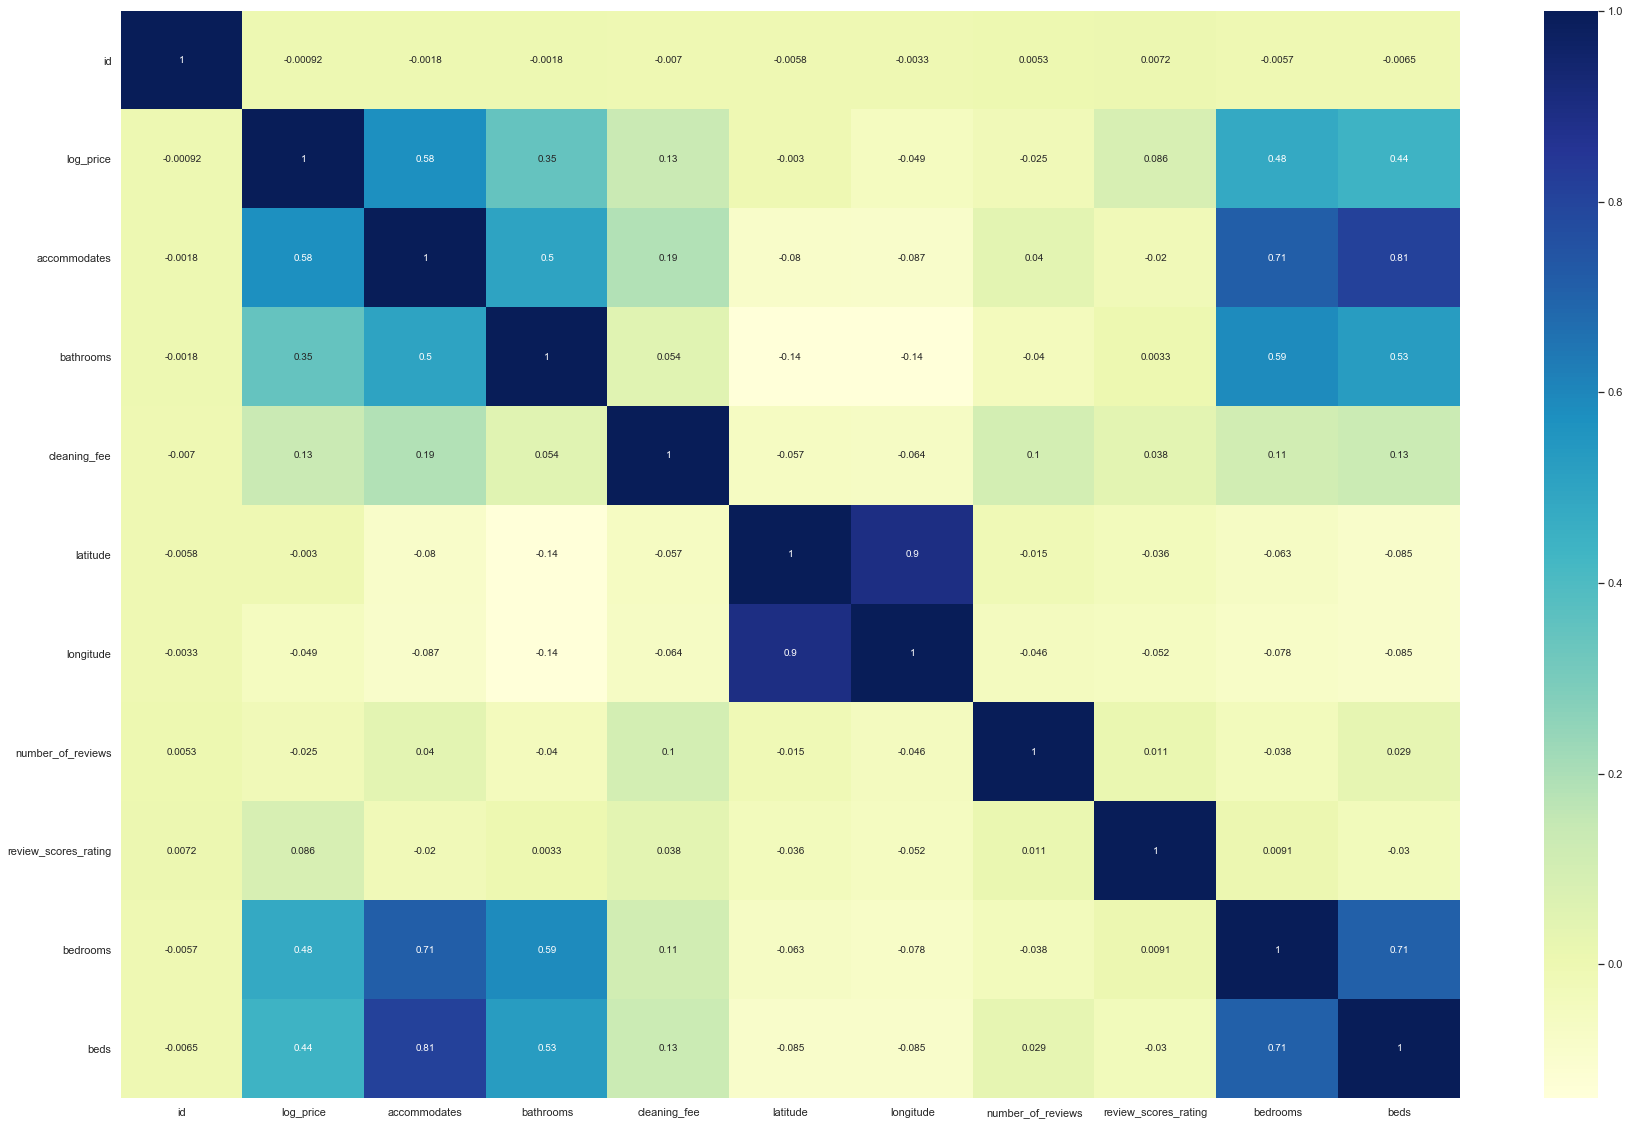

In [225]:
plt.figure(figsize=(30,20)) 
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### Histogram of various features present in the dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249EC120D48>,
      dtype=object)

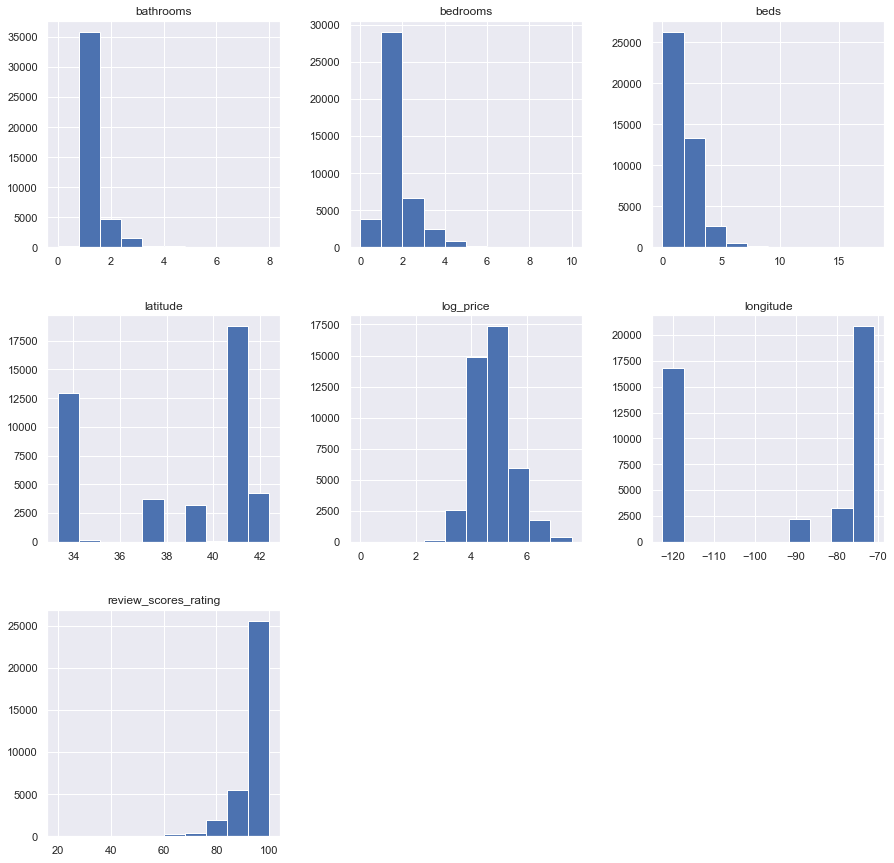

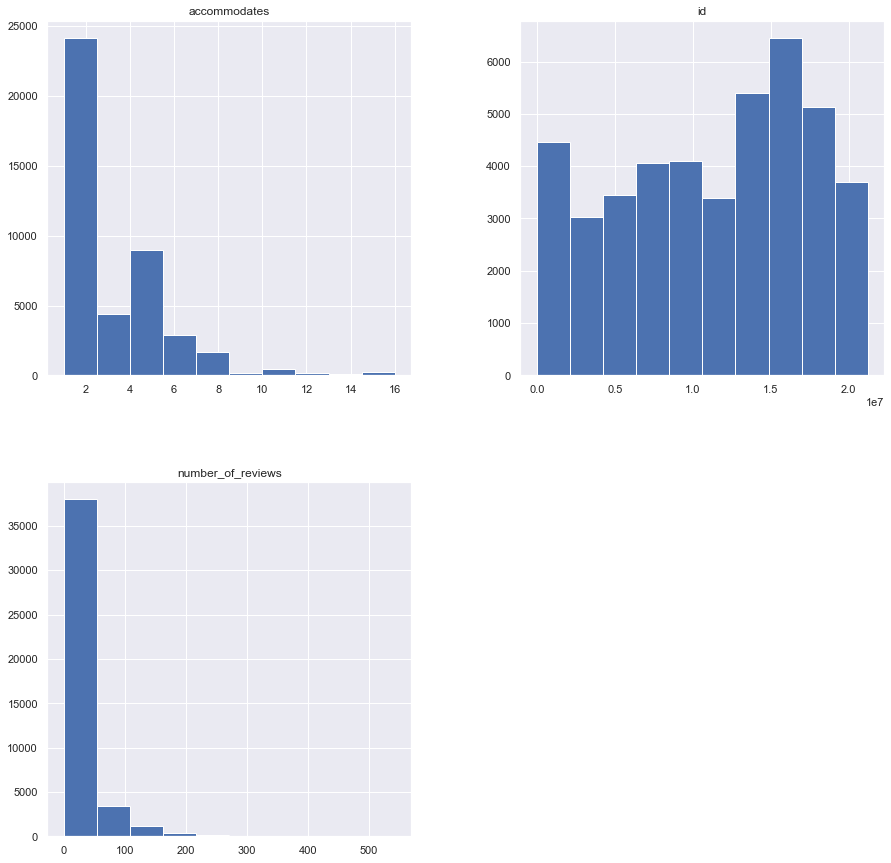

In [226]:
data[data.dtypes[(data.dtypes=="float")].index.values].hist(figsize=[15,15])
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[15,15])

In [227]:
data=data.drop(['id', 'amenities', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood','thumbnail_url', 'zipcode'],axis=1)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43167 entries, 0 to 43166
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             43167 non-null  float64
 1   property_type         43167 non-null  object 
 2   room_type             43167 non-null  object 
 3   accommodates          43167 non-null  int64  
 4   bathrooms             43059 non-null  float64
 5   bed_type              43167 non-null  object 
 6   cancellation_policy   43167 non-null  object 
 7   cleaning_fee          43167 non-null  bool   
 8   city                  43167 non-null  object 
 9   instant_bookable      43167 non-null  object 
 10  number_of_reviews     43167 non-null  int64  
 11  review_scores_rating  33878 non-null  float64
 12  bedrooms              43120 non-null  float64
 13  beds                  43098 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage: 4.3+ MB


In [229]:
# Looking for NaN
data.isnull().sum()

log_price                  0
property_type              0
room_type                  0
accommodates               0
bathrooms                108
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
instant_bookable           0
number_of_reviews          0
review_scores_rating    9289
bedrooms                  47
beds                      69
dtype: int64

## Missing Data Imputation

In [230]:
data['bathrooms'].mode()

0    1.0
dtype: float64

In [231]:
data['bedrooms'].mode()

0    1.0
dtype: float64

In [232]:
data['beds'].mode()

0    1.0
dtype: float64

In [233]:
#imputing values with mean, median and mode
#mode is 1.0
data['bathrooms'].fillna(data['bathrooms'].mode()[0],inplace=True)
#mode is 1 bedroom
data['bedrooms'].fillna(data['bedrooms'].mode()[0],inplace=True)
#mode is 1 bed
data['beds'].fillna(data['beds'].mode()[0],inplace=True)
data['review_scores_rating'].fillna(data['review_scores_rating'].mean(),inplace=True)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43167 entries, 0 to 43166
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             43167 non-null  float64
 1   property_type         43167 non-null  object 
 2   room_type             43167 non-null  object 
 3   accommodates          43167 non-null  int64  
 4   bathrooms             43167 non-null  float64
 5   bed_type              43167 non-null  object 
 6   cancellation_policy   43167 non-null  object 
 7   cleaning_fee          43167 non-null  bool   
 8   city                  43167 non-null  object 
 9   instant_bookable      43167 non-null  object 
 10  number_of_reviews     43167 non-null  int64  
 11  review_scores_rating  43167 non-null  float64
 12  bedrooms              43167 non-null  float64
 13  beds                  43167 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage: 4.3+ MB


In [235]:
data.describe()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
count,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000
mean,4.768036,3.163227,1.240994,21.383928,94.056054,1.272176,1.724743
std,0.722506,2.180998,0.594729,38.189374,6.875271,0.858242,1.292788
min,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,4.248495,2.000000,1.000000,1.000000,93.000000,1.000000,1.000000
50%,4.700480,2.000000,1.000000,6.000000,94.056054,1.000000,1.000000
75%,5.192957,4.000000,1.000000,24.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,542.000000,100.000000,10.000000,18.000000


In [236]:
data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,f,2,100.000000,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,6,93.000000,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,10,92.000000,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,f,0,94.056054,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,4,40.000000,0.0,1.0


In [237]:
data.describe(include = 'O')

,property_type,room_type,bed_type,cancellation_policy,city,instant_bookable
count,43167,43167,43167,43167,43167,43167
unique,33,3,5,5,6,2
top,Apartment,Entire home/apt,Real Bed,strict,NYC,f
freq,28405,23560,41886,20068,18826,31717


In [238]:
data['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Dorm', 'Bed & Breakfast', 'Guesthouse', 'Bungalow', 'Other',
       'Guest suite', 'In-law', 'Boat', 'Villa', 'Cabin', 'Treehouse',
       'Timeshare', 'Camper/RV', 'Serviced apartment', 'Boutique hotel',
       'Tipi', 'Vacation home', 'Tent', 'Casa particular', 'Earth House',
       'Yurt', 'Train', 'Castle', 'Hut', 'Chalet', 'Cave', 'Island'],
      dtype=object)

In [239]:
data['property_type'] = data['property_type'].astype('category').cat.codes

In [240]:
data['instant_bookable'] = data['instant_bookable'].map({'f':0, 't':1})

In [241]:
#categorical=['room_type','bed_type','cancellation_policy','city']
data=pd.concat((data,pd.get_dummies(data['room_type'])),axis=1)
data=pd.concat((data,pd.get_dummies(data['bed_type'])),axis=1)
data=pd.concat((data,pd.get_dummies(data['cancellation_policy'])),axis=1)
data=pd.concat((data,pd.get_dummies(data['city'])),axis=1)

In [242]:
data=data.drop(['room_type','bed_type','cancellation_policy', 'city'],axis=1)

In [243]:
data.isnull().sum()

log_price               0
property_type           0
accommodates            0
bathrooms               0
cleaning_fee            0
instant_bookable        0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
Entire home/apt         0
Private room            0
Shared room             0
Airbed                  0
Couch                   0
Futon                   0
Pull-out Sofa           0
Real Bed                0
flexible                0
moderate                0
strict                  0
super_strict_30         0
super_strict_60         0
Boston                  0
Chicago                 0
DC                      0
LA                      0
NYC                     0
SF                      0
dtype: int64

In [244]:
data.head()

,log_price,property_type,accommodates,bathrooms,cleaning_fee,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,...,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,0,3,1.0,True,0,2,100.000000,1.0,1.0,...,0,1,0,0,0,0,0,0,1,0
1,5.129899,0,7,1.0,True,1,6,93.000000,3.0,3.0,...,0,1,0,0,0,0,0,0,1,0
2,4.976734,0,5,1.0,True,1,10,92.000000,1.0,3.0,...,1,0,0,0,0,0,0,0,1,0
3,6.620073,17,4,1.0,True,0,0,94.056054,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,4.744932,0,2,1.0,True,1,4,40.000000,0.0,1.0,...,1,0,0,0,0,0,1,0,0,0


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43167 entries, 0 to 43166
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             43167 non-null  float64
 1   property_type         43167 non-null  int8   
 2   accommodates          43167 non-null  int64  
 3   bathrooms             43167 non-null  float64
 4   cleaning_fee          43167 non-null  bool   
 5   instant_bookable      43167 non-null  int64  
 6   number_of_reviews     43167 non-null  int64  
 7   review_scores_rating  43167 non-null  float64
 8   bedrooms              43167 non-null  float64
 9   beds                  43167 non-null  float64
 10  Entire home/apt       43167 non-null  uint8  
 11  Private room          43167 non-null  uint8  
 12  Shared room           43167 non-null  uint8  
 13  Airbed                43167 non-null  uint8  
 14  Couch                 43167 non-null  uint8  
 15  Futon              

In [246]:
data.describe()

,log_price,property_type,accommodates,bathrooms,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Entire home/apt,...,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF
count,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,...,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000,43167.000000
mean,4.768036,5.745616,3.163227,1.240994,0.265249,21.383928,94.056054,1.272176,1.724743,0.545787,...,0.267288,0.464892,0.001761,0.000232,0.047397,0.051243,0.074849,0.304376,0.436120,0.086015
std,0.722506,8.449297,2.180998,0.594729,0.441471,38.189374,6.875271,0.858242,1.292788,0.497905,...,0.442549,0.498772,0.041923,0.015219,0.212490,0.220495,0.263150,0.460148,0.495908,0.280389
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.248495,0.000000,2.000000,1.000000,0.000000,1.000000,93.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.700480,0.000000,2.000000,1.000000,0.000000,6.000000,94.056054,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.192957,17.000000,4.000000,1.000000,1.000000,24.000000,99.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.600402,32.000000,16.000000,8.000000,1.000000,542.000000,100.000000,10.000000,18.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the data

In [247]:
y = pd.DataFrame(data['log_price'])

In [248]:
X=data.drop(['log_price'],axis=1)
X.head()

,property_type,accommodates,bathrooms,cleaning_fee,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,Entire home/apt,...,moderate,strict,super_strict_30,super_strict_60,Boston,Chicago,DC,LA,NYC,SF
0,0,3,1.0,True,0,2,100.000000,1.0,1.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,7,1.0,True,1,6,93.000000,3.0,3.0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,5,1.0,True,1,10,92.000000,1.0,3.0,1,...,1,0,0,0,0,0,0,0,1,0
3,17,4,1.0,True,0,0,94.056054,2.0,2.0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,2,1.0,True,1,4,40.000000,0.0,1.0,1,...,1,0,0,0,0,0,1,0,0,0


In [249]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

## Scaling the Data

#### We used Standard scaling as features in the dataset had outliers; all the features were normalized to unit variance for better estimation of the various machine learning algorithms utilized in the project.

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [251]:
X_train = pd.DataFrame(X_train, columns = X_train_org.columns)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)

Train dataset dimensionality: (32375, 28)
Train dataset dimensionality: (32375, 1)


In [252]:
X_test = pd.DataFrame(X_test, columns = X_test_org.columns)
print('Test dataset dimensionality:' , X_test.shape)
print('Train dataset dimensionality:' , y_test.shape)

Test dataset dimensionality: (10792, 28)
Train dataset dimensionality: (10792, 1)


## Bagging
Bagging allows training instances to be sampled several times for the same predictor. To perform bagging, we have the hyper parameter 'bootstrap' which is responsible for aggregation and is set to True while building the model.

### Model 1 - Random Forest Regressor with Bagging

In [38]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.61


In [47]:
#Grid Search to find best parameter for RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9}
Best cross-validation score: 0.61


In [48]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=9, random_state=0)
bag_clf = BaggingRegressor(rf_reg, bootstrap=True, n_estimators=500, max_samples=500, oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)

pred_rfreg = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_rfreg))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_rfreg)))

Train score: 0.60
Test score: 0.59
RMSE: 0.4585
r2_score: 0.5944


In [49]:
bag_clf.oob_score_

0.5993613718180223

### Model 2 - Decision Tree with Bagging

In [41]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.61


In [42]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 7}
Best cross-validation score: 0.58


In [43]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=7,random_state=0)

bag_clf = BaggingRegressor(dtree, bootstrap=True,n_estimators=500, max_samples=500,oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)

pred_dtree = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_dtree))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_dtree)))

Train score: 0.60
Test score: 0.59
RMSE: 0.4587
r2_score: 0.5940


In [44]:
bag_clf.oob_score_

0.599158158813542

## Pasting
When sampling is performed without replacement, it is called pasting. To perform pasting, we have the hyper parameter 'bootstrap' which is responsible for aggregation set to False while building the model.

### Model 1 - Random Forest Regressor with Pasting

In [53]:
# Grid search to find the best parameter for Pasting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.61


In [45]:
#Grid Search to find best parameter for RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9}
Best cross-validation score: 0.61


In [50]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=9, random_state=0)
bag_clf = BaggingRegressor(rf_reg, n_estimators=500, max_samples=500, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)

pred_rfreg = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_rfreg))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_rfreg)))

Train score: 0.61
Test score: 0.60
RMSE: 0.4580
r2_score: 0.5952


### Model 2 - Lasso Regressor with Pasting

In [65]:
# Grid search to find the best parameter for Pasting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.61


In [51]:
# Grid search to find the best parameter for the model
from  sklearn.linear_model import Lasso
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.57


In [67]:
lasso = Lasso(alpha=0.001)
bag_lasso_reg = BaggingRegressor(lasso, n_estimators=500, max_samples=500, bootstrap=False, n_jobs=-1, random_state=0)

bag_lasso_reg.fit(X_train, y_train)
y_pred = bag_lasso_reg.predict(X_test)

print('Train Score: {:.2f}'.format(bag_lasso_reg.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(bag_lasso_reg.score(X_test, y_test)))

Train Score: 0.57
Test Score: 0.56


## Adaboost Boosting
Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”.

### Model 1 - Decision Tree

In [55]:
# Grid search to find the best adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]}

grid_search = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.54


In [56]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 7}
Best cross-validation score: 0.58


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

dtree = DecisionTreeRegressor(max_depth=7,random_state=0)

ada_clf = AdaBoostRegressor(dtree, n_estimators=200,learning_rate=0.01, random_state=0)

ada_clf.fit(X_train, y_train)

pred_dtree = bag_clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_dtree))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_dtree)))

Accuracy on training set: 0.616
Accuracy on test set: 0.595
RMSE: 0.4580
r2_score: 0.5952


### Model 2 - Ridge Regression

In [62]:
#Grid Search to find best parameter for Ridge Regressor
from  sklearn.linear_model import Ridge
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.57


In [63]:
# Grid search to find the best adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]}

grid_search = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.54


In [66]:
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ada_reg = AdaBoostRegressor(ridge,n_estimators=200, learning_rate=0.01, random_state=0)

ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)

print('Train Score: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(ada_reg.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred)))

Train Score: 0.57
Test Score: 0.56
RMSE: 0.4779
r2_score: 0.5593


## Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [68]:
# grid search for finding the best parameters for gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 6)}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.62


In [69]:
# building the model with best parameters

gbrt = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth = 5, random_state=0)
gbrt.fit(X_train, y_train)
pred_gbrt = gbrt.predict(X_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_gbrt))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_gbrt)))

Accuracy on training set: 0.667
Accuracy on test set: 0.626
RMSE: 0.4403
r2_score: 0.6260


## PCA

In [70]:
X=data.drop(['log_price'],axis=1)
y = pd.DataFrame(data['log_price'])

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [34]:
from sklearn.decomposition import PCA
import numpy as np

# Make an instance of the Model
pca = PCA(n_components=0.95)

In [35]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [36]:
np.sum(pca.explained_variance_ratio_)

0.9657759064974523

In [37]:
pca.n_components_

21

In [38]:
X_train.shape

(32375, 21)

### We have reduced components to 21 by implementing PCA, which would improve the computational time. 

## Model 1 - Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

regressor.fit(X_train, y_train)
print('Train Score for Linear Regression model : {:.3f}'.format(regressor.score(X_train, y_train)))
print('Test Score for Linear Regression model : {:.3f}\n'.format(regressor.score(X_test, y_test)))

pred_linear = regressor.predict(X_test)

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_linear)))

Train Score for Linear Regression model : 0.556
Test Score for Linear Regression model : 0.547

RMSE: 0.4847
r2_score: 0.5468


### Cross Validation

In [526]:
scores_linear = cross_val_score(regressor, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_linear))
print("Average cross-validation training score: {:.2f}".format(scores_linear.mean()))

Cross-validation scores: [0.5484405  0.55916788 0.55720518 0.56496915 0.54565802]
Average cross-validation training score: 0.56


In [527]:
scores = cross_val_score(regressor, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation  test score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.51642631 0.56424201 0.53196774 0.54860391 0.56719963]
Average cross-validation  test score: 0.55


### Apply GridSearch on Linear

In [528]:
from pprint import pprint
pprint(regressor.get_params())

param_grid_linear = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

CrossValidation_linearreg = GridSearchCV(regressor,param_grid_linear ,cv=5, return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_linearreg.fit(X_train, y_train)

best_parameters_lreg=CrossValidation_linearreg.best_params_
print(best_parameters_lreg)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'copy_X': True, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.9s finished


In [529]:
regressor =LinearRegression(copy_X = True,fit_intercept = True, normalize= True)

regressor.fit(X_train, y_train)

y_pred_linear=regressor.predict(X_test)

print('Train score: {:.4f} %'.format(regressor.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(regressor.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_linear))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_linear)))

Train score: 55.5848 %
Test score: 54.6803 %
RMSE: 0.4847
r2_score: 0.5468


We observed that for Linear regression train score is 55.58% and test score is 54.68%  with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

## Model 2 - Polynomial Regression

In [79]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regressor = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_reg_poly = poly.fit_transform(X_train)
    X_test_reg_poly = poly.transform(X_test)
    regressor_poly =LinearRegression()
    regressor_poly.fit(X_train_reg_poly, y_train)
    train_score_list.append(regressor_poly.score(X_train_reg_poly, y_train))
    test_score_list.append(regressor_poly.score(X_test_reg_poly, y_test))
    
print(train_score_list)
print(test_score_list)
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
regressor_poly.fit(X_train_poly, y_train)

pred_poly=regressor_poly.predict(X_test_poly)

print('Train score: {:.4f} %'.format(regressor_poly.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(regressor_poly.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_poly))))
print('R2 score: {:.4f}'.format(r2_score(y_test,pred_poly)))

[0.5558481245537528, 0.6083631800444771, 0.6417231900597078]
[0.5468032301476791, -2.90934140421636e+17, -9.99751249283171e+18]
Train score: 55.5848 %
Test score: 54.6803 %
RMSE: 0.4847
R2 score: 0.5468


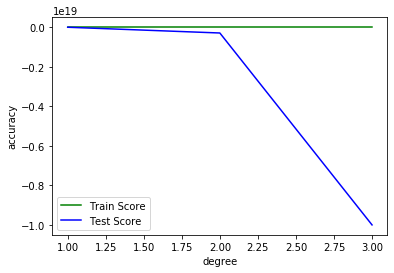

In [80]:
x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [83]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
regressor_poly.fit(X_train_poly, y_train)

pred_poly=regressor_poly.predict(X_test_poly)

print('Train score: {:.4f} %'.format(regressor_poly.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(regressor_poly.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_poly))))
print('R2 score: {:.4f}'.format(r2_score(y_test,pred_poly)))

Train score: 55.5848 %
Test score: 54.6803 %
RMSE: 0.4847
R2 score: 0.5468


### Cross validation

In [533]:
scores = cross_val_score(regressor_poly, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation  training score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.5484405  0.55916788 0.55720518 0.56496915 0.54565802]
Average cross-validation  training score: 0.56


In [534]:
scores = cross_val_score(regressor_poly, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation  test score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.51642631 0.56424201 0.53196774 0.54860391 0.56719963]
Average cross-validation  test score: 0.55


### Grid Search on Polynomial

In [535]:
from pprint import pprint
pprint(poly.get_params())

#degrees = np.arange(1, 25)
param_grid_poly = { 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False] }
CrossValidation_poly = GridSearchCV(regressor_poly,cv=5 ,param_grid=param_grid_poly, verbose=1, n_jobs=-1, scoring= None)
CrossValidation_poly.fit(X_train, y_train)

best_parameters_poly=CrossValidation_poly.best_params_
print(best_parameters_poly)

{'degree': 1, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'copy_X': True, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.8s finished


In [536]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
regressor_poly=LinearRegression(copy_X= True,fit_intercept=True,normalize =True)
regressor_poly.fit(X_train_poly, y_train)

y_pred_poly=regressor_poly.predict(X_test_poly)

print('Train score: {:.4f} %'.format(regressor_poly.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(regressor_poly.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('R2 score: {:.4f}'.format(r2_score(y_test,y_pred_poly)))

Train score: 55.5848 %
Test score: 54.6803 %
RMSE: 0.4847
R2 score: 0.5468


We noticed that for Polynomial regression, train score is 55.58% and test score is 54.68% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

## Model 3 - Ridge Regressor

In [537]:
from  sklearn.linear_model import Ridge

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_range = [0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []


for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, 'Hyperparameter:alpha')

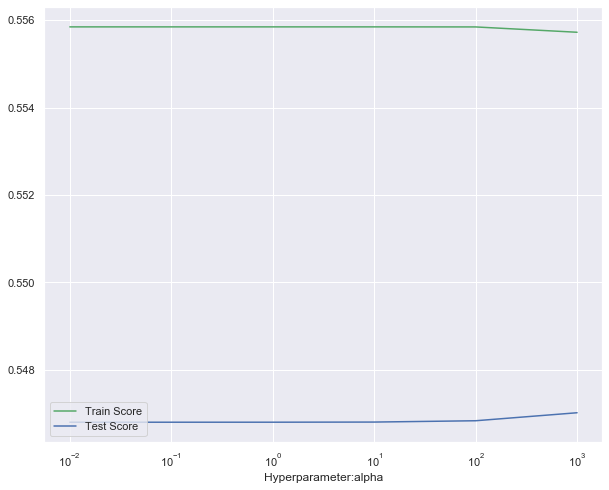

In [538]:
%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('Hyperparameter:alpha')

In [539]:
print(train_score_list)
print(test_score_list)

[0.5558481245537399, 0.5558481245524588, 0.5558481244243615, 0.5558481116204121, 0.5558468369857931, 0.5557248875873535]
[0.546803233655923, 0.5468032652288517, 0.5468035808327423, 0.5468067243381723, 0.5468369121542547, 0.547019912756416]


In [540]:
#It seems like alpha = 100 is the best paramter for Ridge model
ridge = Ridge(alpha=1000)
ridge.fit(X_train, y_train)
pred_ridge=ridge.predict(X_test)
print('Train score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_train,y_train)))
print('Test score on best parameters for Ridge regressor {:.3f}'.format(ridge.score(X_test,y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_ridge))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_ridge)))

Train score on best parameters for Ridge regressor 0.556
Test score on best parameters for Ridge regressor 0.547
RMSE: 0.4846
r2_score: 0.5470


In [541]:
ridge.coef_

array([[ 2.30927228e-01, -4.70388725e-02,  4.41893400e-02,
         6.96264335e-02,  1.15776693e-01, -2.18933843e-02,
         7.29608844e-02, -1.19648899e-01,  1.75419387e-02,
        -2.65257102e-02,  7.69508510e-02, -2.19397173e-02,
         9.96348961e-05,  3.70308157e-03,  1.22142037e-03,
        -3.17856505e-02,  2.66071679e-02, -3.10762430e-02,
         6.75394399e-02,  6.00774116e-02,  3.91522014e-02]])

In [542]:
ridge.intercept_

array([4.77207239])

### Cross Validation

In [543]:
scores_ridge = cross_val_score(ridge, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_ridge))
print("Average cross-validation training score: {:.2f}".format(scores_ridge.mean()))

Cross-validation scores: [0.54811273 0.55893421 0.55730375 0.56480911 0.54544529]
Average cross-validation training score: 0.55


In [544]:
scores_ridge = cross_val_score(ridge, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_ridge))
print("Average cross-validation test score: {:.2f}".format(scores_ridge.mean()))

Cross-validation scores: [0.5163731  0.56096605 0.5315327  0.54668365 0.56698583]
Average cross-validation test score: 0.54


### Applying gridSearch

In [551]:
from pprint import pprint
pprint(ridge.get_params())

param_grid_ridge = { 'alpha': [0.01, 0.1, 1, 10, 100, 1000],'fit_intercept': [True,False],'normalize': [True,False]}
            
CrossValidation_ridge = GridSearchCV(estimator =ridge, cv=5, param_grid = param_grid_ridge , return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_ridge.fit(X_train, y_train)

best_parameters_ridge=CrossValidation_ridge.best_params_
print(best_parameters_ridge)

{'alpha': 1000,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s


{'alpha': 100, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished


In [552]:
ridge = Ridge(alpha = 1000,fit_intercept= True, normalize= False)
ridge.fit(X_train,y_train)

y_pred_ridge=ridge.predict(X_test)

print('Train score: {:.4f} %'.format(ridge.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ridge.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_ridge))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_ridge)))

Train score: 55.5725 %
Test score: 54.7020 %
RMSE: 0.4846
r2_score: 0.5470


We observed that for Ridge regression, train score is 55.57% and test score is 54.70% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

## Model 4 - Lasso Regressor

In [553]:
from  sklearn.linear_model import Lasso

x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [560]:
print(train_score_list)
print(test_score_list)

[0.5558134975975717, 0.5527405546511472, 0.4428248339948766, 0.0, 0.0, 0.0]
[0.5468959399600914, 0.5448812117898347, 0.43903911792206374, -0.0005030084282486857, -0.0005030084282486857, -0.0005030084282486857]


Text(0.5, 0, '$\\alpha$')

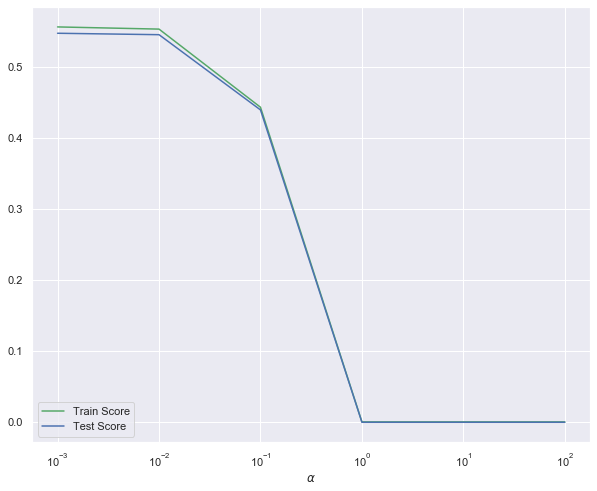

In [561]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [562]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
pred_lasso=lasso.predict(X_test)
print('Train score on best parameters for Lasso regressor {:.3f}'.format(lasso.score(X_train,y_train)))
print('Test score on best parameters for Lasso regressor {:.3f}'.format(lasso.score(X_test,y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_lasso))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_lasso)))

Train score on best parameters for Lasso regressor 0.556
Test score on best parameters for Lasso regressor 0.547
RMSE: 0.4846
r2_score: 0.5469


### Cross Validation

In [563]:
scores_lasso = cross_val_score(lasso, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_lasso))
print("Average cross-validation training score: {:.2f}".format(scores_lasso.mean()))

Cross-validation scores: [0.54821641 0.55913263 0.55747725 0.56502551 0.54556387]
Average cross-validation training score: 0.56


In [564]:
scores_lasso = cross_val_score(lasso, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_lasso))
print("Average cross-validation test score: {:.2f}".format(scores_lasso.mean()))

Cross-validation scores: [0.51684708 0.56373847 0.53275902 0.54834846 0.567626  ]
Average cross-validation test score: 0.55


### Applying Grid

In [565]:
from pprint import pprint
pprint(lasso.get_params())

param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'fit_intercept': [True,False], 'normalize': [True,False]}
            
CrossValidation_lasso = GridSearchCV(estimator =lasso, cv=5, param_grid = param_grid_ridge , return_train_score=True, verbose = 1, n_jobs = -1)
CrossValidation_lasso.fit(X_train, y_train)

best_parameters_lasso=CrossValidation_lasso.best_params_
print(best_parameters_lasso)

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.7s finished


{'alpha': 0.01, 'fit_intercept': True, 'normalize': False}


In [566]:
lasso = Lasso(alpha = 0.001,fit_intercept = True, normalize = False)
lasso.fit(X_train,y_train)

y_pred_lasso=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_lasso)))

Train score: 55.5813 %
Test score: 54.6896 %
RMSE: 0.4846
r2_score: 0.5469


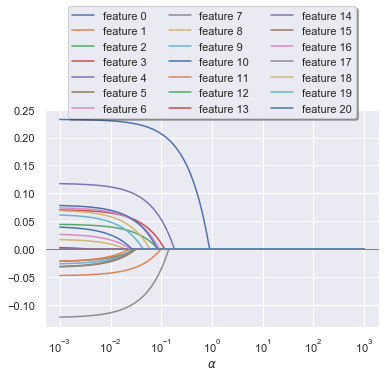

In [567]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,21):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

We observed that for Lasso regression, train score is 55.58% and test score is 54.68% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

## Model 5 - Decision Tree Regressor

In [568]:
%matplotlib notebook
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=8,random_state=0)
dtree.fit(X_train, y_train)
pred_dtree = dtree.predict(X_test)

train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)
print('train_score=',train_score)
print('test_score=',test_score)
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_dtree))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_dtree)))

train_score= 0.5903726318585184
test_score= 0.5263268671203796
RMSE: 0.4955
r2_score: 0.5263


### Decision Tree Regressor With GridSearch cross validation

In [569]:
# Train a Decision Tree model, the best parameters, and model performance
# find the optimal max_depth

dtree = DecisionTreeRegressor(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': [5,6,7,8,9,10],
              'splitter':["best","random"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

y_pred_dtree = grid_dtree.predict(X_test)

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))

train_score=grid_dtree.score(X_train,y_train)
test_score=grid_dtree.score(X_test,y_test)

# train and test score
print('DTree_train_score=',train_score)
print('Dtree_test_score=',test_score)
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_dtree))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_dtree)))

Decision Tree parameters:  {'max_depth': 8, 'splitter': 'best'}
Best Mean Cross-validation score: 0.53
DTree_train_score= 0.5903726318585184
Dtree_test_score= 0.5263268671203796
RMSE: 0.4955
r2_score: 0.5263


[1.22251689e-02 3.26220960e-02 1.87713874e-01 1.40483840e-03
 1.29298141e-03 2.09254251e-02 7.36566922e-03 3.06028883e-02
 2.62933065e-03 6.14998876e-01 0.00000000e+00 2.37939610e-02
 5.97395988e-05 1.57741200e-04 0.00000000e+00 1.08128161e-04
 3.94881193e-04 6.41284892e-04 8.64444843e-04 2.60822286e-04
 4.11006851e-04 0.00000000e+00 0.00000000e+00 9.73066177e-03
 7.03709634e-03 1.71988786e-02 3.93941214e-03 2.36207936e-02]


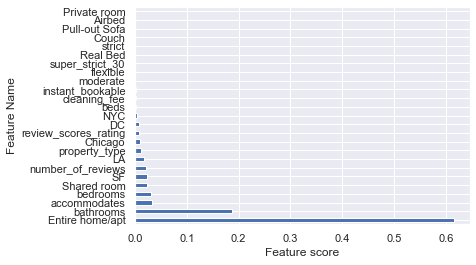

In [570]:
%matplotlib inline
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(max_depth=8, random_state=0)
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.xlabel("Feature score")
plt.ylabel("Feature Name")
plt.show()

We observed that for Decision Tree regression, train score is 59% and test score is 52% with Grid Search cross validation and we can confirm that after executing PCA both train and test accuracy has reduced.

## Model 6 - Linear Support Vector Machine Regressor

In [576]:
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)

pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_svm))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_svm)))

Train score: 54.9760 %
Test score: 54.2135 %
RMSE: 0.4872
r2_score: 0.5421


In [572]:
sns.set(rc={'figure.figsize':(15,12)})
linear_svm = LinearSVR()

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

trainscore_array = []
testscore_array = []

for n in range(60,70):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    trainscore_array.append(linear_svm.score(X_train, y_train))
    testscore_array.append(linear_svm.score(X_test, y_test))
print(trainscore_array)
print(testscore_array)

[0.4131396744170943, 0.4588185494094644, 0.428426071957705, 0.5095021203640191, 0.4462723985463197, 0.3925480272154044, 0.4908158557832455, 0.466193309256525, 0.4508016151366797, 0.46508171080328986]
[0.3942534400846992, 0.4494608819619357, 0.40253781840450154, 0.49666275452494746, 0.44724757736473875, 0.33776090503543976, 0.47989018546934625, 0.4509331874927708, 0.44148076792777147, 0.4346110314775441]


Text(0, 0.5, 'Score')

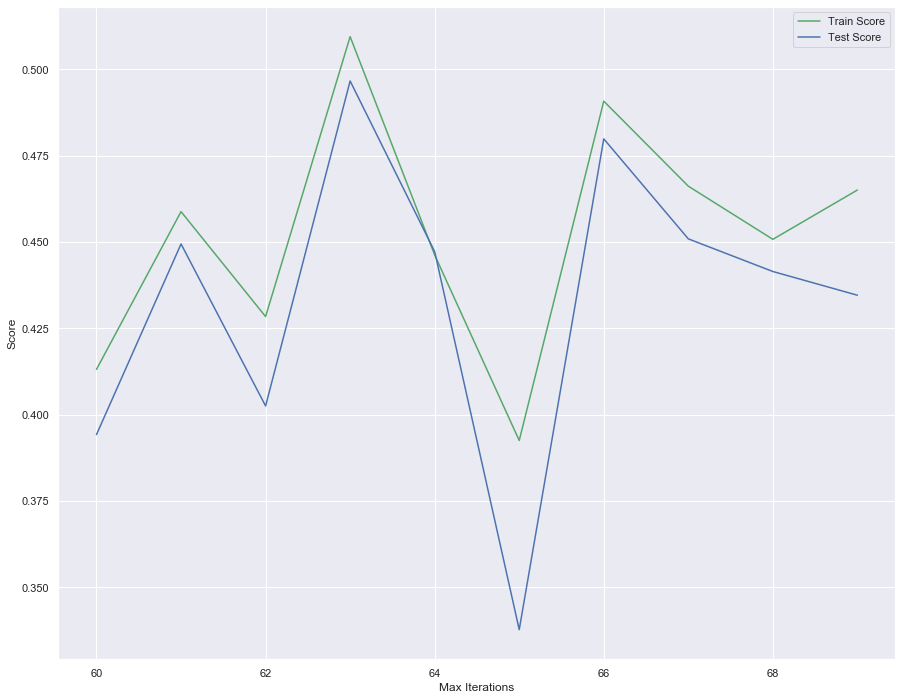

In [573]:
x_axis = range(60,70)
plt.plot(x_axis, trainscore_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, testscore_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

### Using cross validation for Linear SVM to find average training and test scores

In [577]:
scores_SVM = cross_val_score(linear_svm, X_train,y_train,cv=5)
print("Cross-validation scores: {}".format(scores_SVM))
print("Average cross-validation training score: {:.2f}".format(scores_SVM.mean()))

Cross-validation scores: [0.54137008 0.55358582 0.55231552 0.55784922 0.5404921 ]
Average cross-validation training score: 0.55


In [578]:
scores_SVM = cross_val_score(linear_svm, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_SVM))
print("Average cross-validation test score: {:.2f}".format(scores_SVM.mean()))

Cross-validation scores: [0.50389429 0.55688548 0.53012954 0.53823442 0.56530107]
Average cross-validation test score: 0.54


For Linear SVR, we observed that train accuracy is 56.59% and 55.78%.

### Applying Grid Search to Linear SVM

In [456]:
from pprint import pprint
pprint(linear_svm.get_params())

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 69,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}


In [457]:
param_grid_linearsvm = {
            'max_iter' : range(60,70),
            }

CV_linearsvm = GridSearchCV(estimator =linear_svm, param_grid = param_grid_linearsvm , return_train_score=True, verbose = 1, n_jobs = -1)
CV_linearsvm.fit(X_train, y_train)

best_parameters_linearsvm=CV_linearsvm.best_params_
print(best_parameters_linearsvm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.1s finished


{'max_iter': 69}


In [585]:
linear_svm = LinearSVR(C=0.1)
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_svm)))

Train score: 55.1069 %
Test score: 54.3157 %
RMSE: 0.4866
r2_score: 0.5432


We observed that for Linear Support Vector Regression, train score is 55.10% and test score is 54.31% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

## Model 6 - KNN Regressor with Grid Search

In [588]:
from sklearn.neighbors import KNeighborsRegressor
sns.set(rc={'figure.figsize':(15,25)})

train_score_array = []
test_score_array = []

for k in range(15,25):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test)) 

Text(0, 0.5, 'MSE')

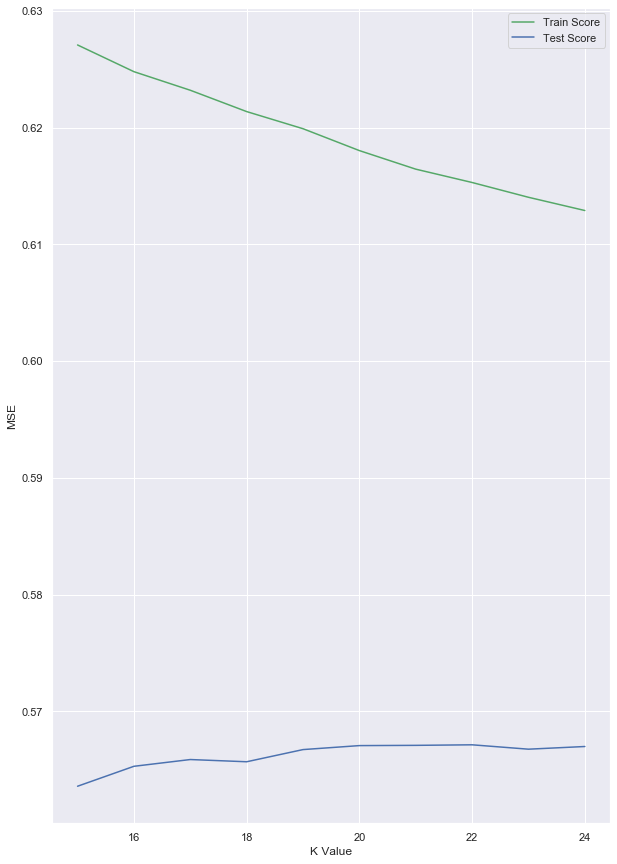

In [589]:
x_axis = range(15,25)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('K Value')
plt.ylabel('MSE')

### Applying grid search with cross validation on KNN

In [586]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# define a list of parameters

param_knn = {'n_neighbors': range(20,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, return_train_score=True)
grid_knn.fit(X_train, y_train)
y_pred_knn=grid_knn.predict(X_test)

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)
print()

print('Train score: {:.4f} %'.format(grid_knn.score(X_train, y_train)))
print('Test score: {:.4f} %'.format(grid_knn.score(X_test, y_test)))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_knn)))

KNN parameters:  {'n_neighbors': 24}

Train score: 0.6129 %
Test score: 0.5670 %
RMSE: 0.4738
r2_score: 0.5670


In [590]:
knn = KNeighborsRegressor()

# define a list of parameters

param_knn = {'n_neighbors': [24]}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

pred_knn=grid_knn.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))

print('Train score: {:.4f} %'.format(grid_knn.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(grid_knn.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_knn))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_knn)))

Best Mean Cross-validation score: 0.58
Train score: 61.2897 %
Test score: 56.6992 %
RMSE: 0.4738
r2_score: 0.5670


For KNN Regressor, we observed that best neighbours parameter is 24 which is providing highest train and test accuracies and lowest difference.

We observed that for KNN Regression, train score is 61.28% and test score is 56.69% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

## Model 7 - SVR with Kernel
#### The data includes 43167 listings/rows, it is taking too long to run the algorithm. Therefore we are slicing the data to 10000 as we did it in the last project as well and then applying PCA for fair comparison with the last project accuarcy.

In [29]:
data1 = data[:10000]

X=data1.loc[:,data.columns!='log_price']
y=data1[['log_price']]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [30]:
from sklearn.decomposition import PCA
import numpy as np

# Make an instance of the Model
pca = PCA(n_components=0.95)

In [31]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
np.sum(pca.explained_variance_ratio_)

0.9631897758874344

In [33]:
pca.n_components_

20

### SVR with Linear Kernel (Grid Search with Cross Validation)

In [43]:
from sklearn.svm import SVR
svr = SVR()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['linear']}
grid_svrkl = GridSearchCV(svr, param_grid,return_train_score=True, cv=5)
grid_svrkl.fit(X_train, y_train)
pred_svrkl=grid_svrkl.predict(X_test)

print('SVR parameters: ', grid_svrkl.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svrkl.best_score_))
train_score=grid_svrkl.score(X_train,y_train)
test_score=grid_svrkl.score(X_test,y_test)

print('Linear_kernel_SVR_train_score=',train_score)
print('Linear_kernel_SVR test_score=',test_score)

SVR parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Best Mean Cross-validation score: 0.56
Linear_kernel_SVR_train_score= 0.5640144104910948
Linear_kernel_SVR test_score= 0.5515411102373446


In [44]:
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_svrkl))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_svrkl)))

RMSE: 0.4889
r2_score: 0.5515


We noticed that for Support Vector with Linear Kernel, train score is 56.40% and test score is 55.15% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

### SVR with Rbf Kernel (Grid Search with Cross Validation)

In [45]:
from sklearn.svm import SVR
svr = SVR()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['rbf']}
grid_svrkr = GridSearchCV(svr, param_grid,return_train_score=True, cv=5)
grid_svrkr.fit(X_train, y_train)
pred_svrkr=grid_svrkr.predict(X_test)

print('SVR parameters: ', grid_svrkr.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svrkr.best_score_))
train_score=grid_svrkr.score(X_train,y_train)
test_score=grid_svrkr.score(X_test,y_test)

print('Rbf_kernel_SVR_train_score=',train_score)
print('Rbf_kernel_SVR test_score=',test_score)

SVR parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Mean Cross-validation score: 0.59
Rbf_kernel_SVR_train_score= 0.6389746985459477
Rbf_kernel_SVR test_score= 0.5764174468779459


In [46]:
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_svrkr))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_svrkr)))

RMSE: 0.4752
r2_score: 0.5764


We noticed that for Support Vector with RBF Kernel, train score is 63.89% and test score is 57.64% with Grid Search cross validation and it is evident that after executing PCA the test accuracy has reduced.

### SVR with Poly Kernel (Grid Search with Cross Validation)

In [34]:
from sklearn.svm import SVR
svr = SVR()
param_grid = {'C': [0.1, 1, 10],'kernel':['poly']}
grid_svrkp = GridSearchCV(svr, param_grid,return_train_score=True, cv=3)
grid_svrkp.fit(X_train, y_train)
pred_svrkp=grid_svrkp.predict(X_test)

print('SVR parameters: ', grid_svrkp.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svrkp.best_score_))
train_score=grid_svrkp.score(X_train,y_train)
test_score=grid_svrkp.score(X_test,y_test)

print('Poly_kernel_SVR_train_score=',train_score)
print('Poly_kernel_SVR test_score=',test_score)

SVR parameters:  {'C': 0.1, 'kernel': 'poly'}
Best Mean Cross-validation score: 0.54
Poly_kernel_SVR_train_score= 0.6055278202473744
Poly_kernel_SVR test_score= 0.5424997012707989


In [35]:
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_svrkp))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_svrkp)))

RMSE: 0.4938
r2_score: 0.5425


We observed that for Support Vector with Poly Kernel, train score is 60.55% and test score is 54.24% with Grid Search cross validation and it is evident that after executing PCA both train and test accuracy has reduced.

##  Accuracies of the models after PCA

In [1]:
import pandas as pd
# Index Levels
outside = ['After PCA','After PCA']
inside = ['Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [2]:
import numpy as np
data_class = np.array([(55.58,55.58,55.57,55.58,59.0,55.10,61.28,56.40,63.89,60.55),
                     (54.68,54.68,54.70,54.68,52.0,54.31,56.69,55.15,57.64,54.24)])

In [3]:
df = pd.DataFrame(data_class,index=hier_index,columns=['Linear Regression','Polynomial Regression','Ridge regression','Lasso regression','Decision Tree regression','Linear Support Vector Regression','KNN Regression','Support Vector with Linear Kernel','Support Vector with RBF Kernel','Support Vector with Poly Kernel'])

In [4]:
import seaborn as sns
cm = sns.light_palette("#3498db", as_cmap=True)
s = df.style.background_gradient(cmap='YlGn')
s

## Conclusion: 

### Hence we conclude that, our best regression model is KNN regressor
(Please note that I did not consider Kernalised SVR models for the best regression models because we sliced the data to 10,000 rows in order to increase the execution time.)